#1ª Análise: Séries Temporais de Vendas

Grupo: Fabiano Antunes, Gabriela Araújo e Mariana Guimarães.

### Chamando as bibliotecas necessárias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patheffects as pe

from week_day import transform_to_date
from natsort import natsorted

### Leitura do arquivo base necessário, transformação em dataframe e print das informações da coluna para saber quantas colunas W existem

In [ ]:
df_wide = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')
df_wide = pd.DataFrame(df_wide)

display(df_wide)
df_wide.info(verbose=True)

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,...,0.00,0.33,0.33,0.00,0.00,0.33,0.00,0.00,0.67,0.00
807,P816,0,1,0,0,1,2,2,6,0,...,0.43,0.43,0.57,0.29,0.57,0.71,0.71,0.71,0.86,0.71
808,P817,1,0,0,0,1,1,2,1,1,...,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.75
809,P818,0,0,0,1,0,0,0,0,1,...,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 107 columns):
 #    Column         Dtype  
---   ------         -----  
 0    Product_Code   object 
 1    W0             int64  
 2    W1             int64  
 3    W2             int64  
 4    W3             int64  
 5    W4             int64  
 6    W5             int64  
 7    W6             int64  
 8    W7             int64  
 9    W8             int64  
 10   W9             int64  
 11   W10            int64  
 12   W11            int64  
 13   W12            int64  
 14   W13            int64  
 15   W14            int64  
 16   W15            int64  
 17   W16            int64  
 18   W17            int64  
 19   W18            int64  
 20   W19            int64  
 21   W20            int64  
 22   W21            int64  
 23   W22            int64  
 24   W23            int64  
 25   W24            int64  
 26   W25            int64  
 27   W26            int64  
 28   W27            int

## Resolução 1:
Usa-se a função do pandas `melt` para "despivotar" as colunas e transformá-las em linhas, cria em seguida uma nova coluna com seus respectivos valores e por fim utiliza-se a função `natsorted` da natsort para ordenar pelos códigos do produto (pois a ordenação padrão de sort by ordenaria 1, 11, 100, 2, 22, 200, etc.)

In [ ]:
df_long_not_ready = pd.melt(
    df_wide,
    id_vars = ['Product_Code'],
    value_vars = [f'W{i}' for i in range(52)],
    var_name = 'Week',
    value_name = 'Transaction_Value'
)

sorted_codes = natsorted(df_long_not_ready['Product_Code'].unique())
df_long = df_long_not_ready.set_index('Product_Code').loc[sorted_codes].reset_index()

display(df_long)

,Product_Code,Week,Transaction_Value
0,P1,W0,11
1,P1,W1,12
2,P1,W2,10
3,P1,W3,8
4,P1,W4,13
...,...,...,...
42167,P819,W47,0
42168,P819,W48,0
42169,P819,W49,0
42170,P819,W50,0


## Resolução 2:
Aplicação da função transform_to_date para atribuir datas

In [ ]:
df_long['Date'] = df_long['Week'].apply(transform_to_date)

display(df_long)

,Product_Code,Week,Transaction_Value,Date
0,P1,W0,11,2022-01-01
1,P1,W1,12,2022-01-08
2,P1,W2,10,2022-01-15
3,P1,W3,8,2022-01-22
4,P1,W4,13,2022-01-29
...,...,...,...,...
42167,P819,W47,0,2022-11-26
42168,P819,W48,0,2022-12-03
42169,P819,W49,0,2022-12-10
42170,P819,W50,0,2022-12-17


## Resolução 3:
Seleção de 3 produtos de forma aleatória utilizando a função `sample` e aplicando `unique` para remover as duplicadas e evitar que seja selecionado o mesmo valor mais de uma vez

In [ ]:
selected_products = df_long['Product_Code'].sample(3).unique()
df_selected = df_long[df_long['Product_Code'].isin(selected_products)]

display(df_selected)


,Product_Code,Week,Transaction_Value,Date
3068,P60,W0,37,2022-01-01
3069,P60,W1,41,2022-01-08
3070,P60,W2,46,2022-01-15
3071,P60,W3,27,2022-01-22
3072,P60,W4,51,2022-01-29
...,...,...,...,...
25319,P489,W47,2,2022-11-26
25320,P489,W48,1,2022-12-03
25321,P489,W49,7,2022-12-10
25322,P489,W50,6,2022-12-17


## Resolução 4: <br>
A partir da variável `df_selected`, é feito o gráfico para esses 3 produtos. As cores para o gráfico já são pré selecionadas. Uso de um gráfico de linha mostrando a evolução do valor das transações (eixo y) ao longo das semanas (eixo x) para cada um dos produtos selecionados aleatoriamente, usando cores diferentes para cada produto. Depois são feitos ajustes para deixar o gráfico visualmente mais bonito.

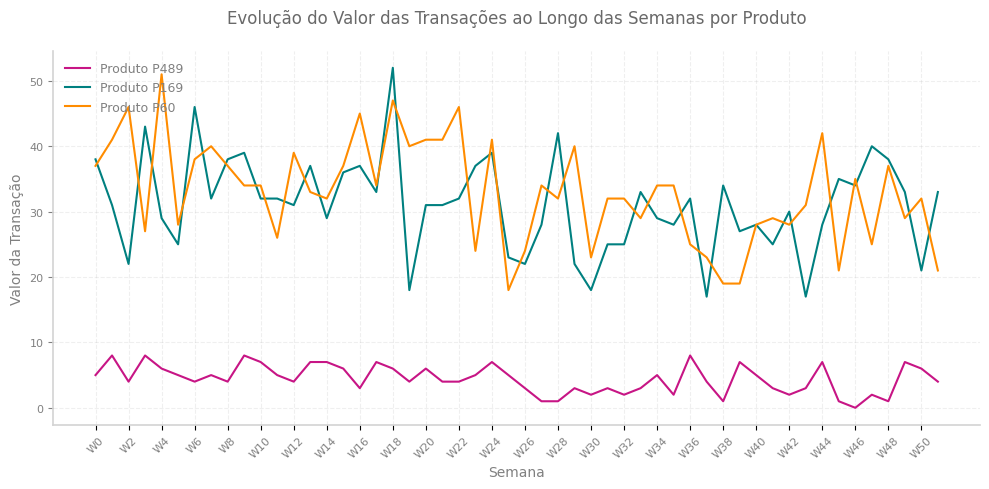

In [ ]:
# Resolução 4

cores =["mediumvioletred", "teal", "darkorange"]

"""Gráfico"""
plt.figure(figsize=(10, 5))
ax = plt.gca()
for i, product in enumerate(selected_products):
    df_product = df_selected[df_selected['Product_Code'] == product]
    plt.plot(
        df_product['Week'],
        df_product['Transaction_Value'],
        label=f'Produto {product}',
        color=cores[i % len(cores)],
        linewidth=1.5)

"""Eixo X com os nomes das semanas de 2 em 2 -> esteticamente mais visual"""
plt.xticks(
    ticks=range(0, 52, 2),
    labels=[f'W{w}' for w in range(0, 52, 2)],
    rotation=45,
    fontsize=8, color='gray')
plt.yticks(fontsize=8, color='gray')

"""Nomes dos eixos e título"""
plt.xlabel('Semana', fontsize=10, color='gray')
plt.ylabel('Valor da Transação', fontsize=10, color='gray')
plt.title(
    'Evolução do Valor das Transações ao Longo das Semanas por Produto',
    fontsize=12,
    color='dimgray',
    pad=20)

"""Ajustes na legenda"""
plt.legend(fontsize=9, frameon=False, labelcolor='gray', loc='upper left')

"""Estilo dos eixos (bordas)"""
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('lightgray')
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['left'].set_linewidth(1.2)
ax.tick_params(axis='y', colors='gray')
ax.grid(True, linestyle='--', alpha=0.2)

plt.tight_layout()
plt.show()


## Resolução 5:
Aplica-se `.copy` para garantir a independência de `df_selected` (pois o pandas não sabe se `df_selected` é uma cópia ou uma referência a `df_long`) e calcula-se a diferença aplicando `.diff()`. Logo após, é criada uma condição para substituir os valores _NaN_ aplicando `.isna()` e `.any()` para que a condição dentro do `if` seja aplicada se houver pelo menos um valor _TRUE_ em `.isna()`.

In [ ]:
# resolução 5

df_selected = df_selected.copy()
df_selected['Diff'] = df_selected.groupby('Product_Code')['Transaction_Value'].diff()

if df_selected['Diff'].isna().any():
    df_selected.loc[df_selected['Diff'].isna(), 'Diff'] = 0

display(df_selected)

,Product_Code,Week,Transaction_Value,Date,Diff
3068,P60,W0,37,2022-01-01,0.0
3069,P60,W1,41,2022-01-08,4.0
3070,P60,W2,46,2022-01-15,5.0
3071,P60,W3,27,2022-01-22,-19.0
3072,P60,W4,51,2022-01-29,24.0
...,...,...,...,...,...
25319,P489,W47,2,2022-11-26,2.0
25320,P489,W48,1,2022-12-03,-1.0
25321,P489,W49,7,2022-12-10,6.0
25322,P489,W50,6,2022-12-17,-1.0


##Resolução 5 - Gráfico:<br>
Para cada produto dos 3 produtos aleatórios selecionados, é filtrado apenas os dados desses produtos. Depois é feito um gráfico, onde o eixo x são as semanas e o eixo y é a variação no valor das transações (calculada na primeira parte da resolução 5)

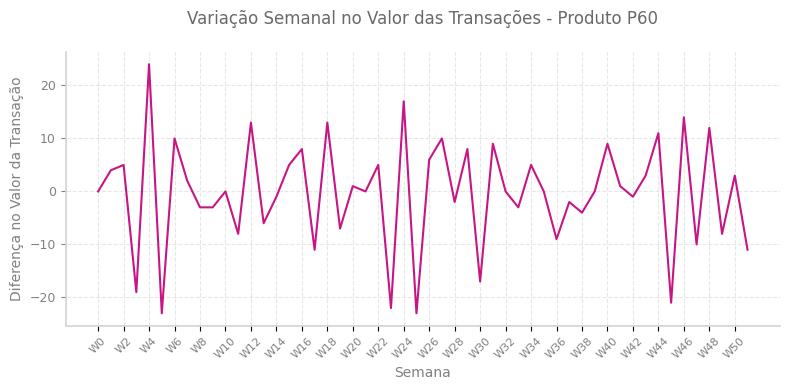

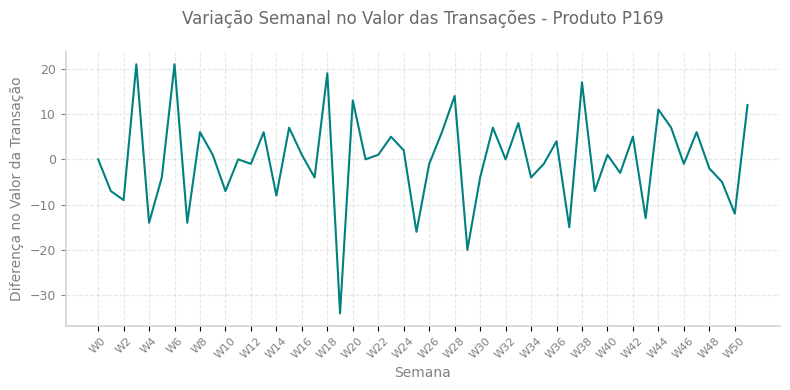

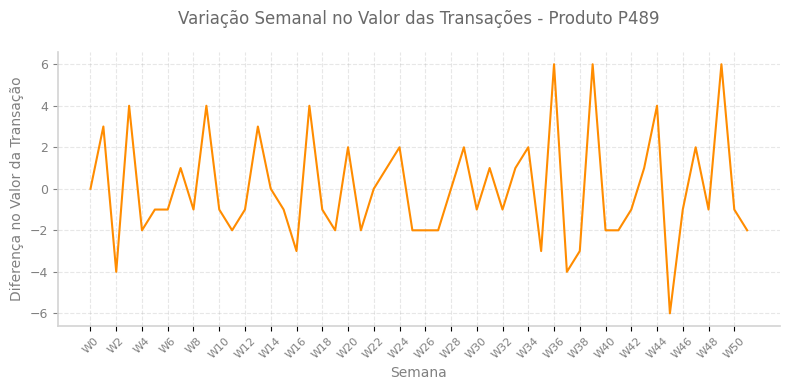

In [ ]:
# Resolução 5

"""Iteração dentro dos produtos selecionados, gerando um gráfico para cada um"""
for i, product in enumerate(df_selected['Product_Code'].unique()):
    df_prod = df_selected[df_selected['Product_Code'] == product]

    """Gráfico"""
    plt.figure(figsize=(8, 4))
    ax = plt.gca()
    plt.plot(
        df_prod['Week'],
        df_prod['Diff'],
        label=f'Produto {product}',
        color=cores[i % len(cores)],
        linewidth=1.5) # Linha mais fina e precisa

    """Gráfico individual de cada produto"""
    plt.title(
        f'Variação Semanal no Valor das Transações - Produto {product}',
        fontsize=12,
        color='dimgray',
        pad=20)
    plt.xlabel('Semana', fontsize=10, color='gray')
    plt.ylabel('Diferença no Valor da Transação', fontsize=10, color='gray')

    """Eixo X com os nomes das semanas de 2 em 2 -> esteticamente mais visual"""
    plt.xticks(
        ticks=range(0, 52, 2),
        labels=[f'W{w}' for w in range(0, 52, 2)],
        rotation=45,
        fontsize=8,
        color='gray')
    plt.yticks(
        fontsize=8,
        color='gray')

    """Estilo dos eixos (bordas)"""
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color('lightgray')
    ax.spines['left'].set_color('lightgray')
    ax.spines['bottom'].set_linewidth(1.2)
    ax.spines['left'].set_linewidth(1.2)
    ax.tick_params(axis='y', labelsize=9, colors='gray')
    ax.grid(True, linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()


## Resolução 6:
Aplicação das funções de agregação `.agg()` para calcular média (mean), mediana (median), desvio padrão (std), valor mínimo (min) e valor máximo (max).

In [ ]:
# resolução 6

stats = df_selected.groupby('Product_Code')['Transaction_Value'].agg(['mean', 'median', 'std', 'min', 'max'])

display(stats)


,mean,median,std,min,max
Product_Code,,,,,
P169,31.096154,31.5,7.436686,17,52
P489,4.423077,4.0,2.181438,0,8
P60,32.980769,33.5,7.961895,18,51


## Resolução 7:<br>
Como explicado antes, o pandas não sabe se `df_selected` é uma cópia ou uma referência a `df_long`, por isso usa-se o `.copy`. Para calcular a média móvel de 3 semanas, se utiliza uma janela deslizante, de forma que fique centrada no ponto atual.
- **Ex.:** na semana 2, temos a média das semanas 1, 2 e 3. Isso foi feito pra suavizar oscilações bruscas. Após isso é feito um gráfico semanas vs média móvel.

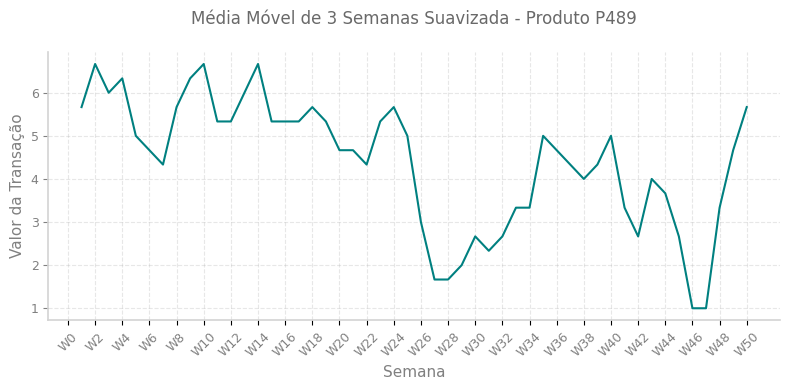

In [ ]:
# Resolução 7

"""Seleciona apenas um produto aleatório"""
produto_escolhido = df_selected['Product_Code'].sample(1).values[0]
df_prod = df_selected[df_selected['Product_Code'] == produto_escolhido].copy()

"""Calcula média móvel de 3 semanas criando uma janela deslizante de 3 semanas, centrada no ponto atual, e depois calcula a média."""
df_prod['Media_Movel_3s'] = df_prod['Transaction_Value'].rolling(window=3, center=True).mean()

"""Gráfico"""
plt.figure(figsize=(8, 4))
ax = plt.gca()
plt.plot(
    df_prod['Week'],
    df_prod['Media_Movel_3s'],
    color='teal',
    linewidth=1.5)

"""Nomes dos eixos e título"""
plt.title(
    f'Média Móvel de 3 Semanas Suavizada - Produto {produto_escolhido}',
    fontsize=12,
    color='dimgray',
    pad=20)
plt.xlabel('Semana', fontsize=11, color='gray')
plt.ylabel('Valor da Transação', fontsize=11, color='gray')

"""Eixo X com os nomes das semanas de 2 em 2 -> esteticamente mais visual"""
plt.xticks(
    ticks=range(0, 52, 2),
    labels=[f'W{w}' for w in range(0, 52, 2)],
    rotation=45,
    fontsize=9,
    color='gray')

"""Estilo dos eixos (bordas)"""
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('lightgray')
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['left'].set_linewidth(1.2)
ax.tick_params(axis='y', labelsize=9, colors='gray')
ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

